<img src = "https://upload.wikimedia.org/wikipedia/commons/e/e2/Confidence-interval.svg" width="540"/>

# Introducción a la probabilidad

## Contenido

1. Muestreo aleatorio simple, estratificado y sistemático de una población
2. Interpretación de probabilidad, funciones de densidad, funciones de variables aleatorias. Distribuciones exponenciales, gaussianas, normales-logarítmicas, chi-cuadrado ($\chi ^{2}$).
3. Valores esperados, funciones binomiales y multinomiales, distribución de Poisson, distribución uniforme.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 06/23/2022

## Conceptos clave:

1. Población: El conjunto completo o "universo", en general no es posible tener acceso al conjunto.
2. Muestra: Un subconjunto incompleto, se requiere que sea representativa para extraer conclusiones sobre la población completa.
3. Estimadores estadísticos: Funciones matemáticas dependientes de la muestra como la media, moda, mediana, etc.

## Ejemplo 1: Escoger entre dos cajas


In [2]:
data = np.array([1,2,2,1,1,1,1,2,2,1,1,2,2,2,1,2,2,2,1,2]) # Esta población es pequeña así que es igual a la muestra, pero  
print(len(data))                                           # conceptualmente no son iguales.

20


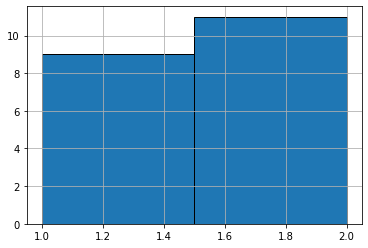

In [3]:
plt.hist(data, bins = 2, ec = 'k') # bins = cajas ; ec = 'edge color'
plt.grid() # Cuadrícula

La gráfica anterior es un [**histograma**](https://es.wikipedia.org/wiki/Histograma#Tipos_de_gráficos_relacionados_con_el_histograma) que representa la frecuencia absoluta por clase entre dos eventos, siendo el eje ordenado la frecuencia y el eje de abscizas las clases. En este caso la primera barra representa la frecuencia con la que fue escogida la caja 1, y la segunda barra representa la frecuencia con la que fue escogida la caja 2. En este experimento hubo sesgo por comentarios del experimentador y porque los participantes conocían las respuestas previas, incluso así las frecuencias de 1 y 2 son bastante cercanas.

## Muestreo

En poblaciones más grandes que no son accesibles, es necesario escoger muestras representativas para evitar sesgos y que las conclusiones extraídas de los datos sean lo más fiel posible a la realidad, para esto se utiliza el [**muestreo**](https://es.wikipedia.org/wiki/Muestreo_(estadística) ); técnicas para seleccionar muestras representativas con propiedades extrapolables a la población minimizando los sesgos, en todo muestreo hay posibilidad de sesgo y un margen de error.
    
## Ejemplo 2: Muestreo sistemático

In [4]:
l = [0,-1,-3,-5,5,7,4,10,12,15,20,19,50,55,60,45] # Población

np.sort(l) # El comando sort genera un array con los elementos de la lista ordenados de menor a mayor

array([-5, -3, -1,  0,  4,  5,  7, 10, 12, 15, 19, 20, 45, 50, 55, 60])

In [5]:
sorted_l = np.sort(l)[::-1] # Este método de indexación invierte el orden de menor a mayor, dejando un array ordenado de mayor
sorted_l                    # a menor.

array([60, 55, 50, 45, 20, 19, 15, 12, 10,  7,  5,  4,  0, -1, -3, -5])

In [6]:
n = 8                      # Tamaño de muestra
k = int(len(l)/n)          # Coeficiente de elevación K = N/n, donde N es el tamaño de la población

i_0 = np.random.randint(k) # Esta función escoge un número entero aleatorio entre 1 y K

Sample = np.zeros(n)       # Esta función crea un array 1D de tamaño n lleno de 0's

Sample[0] = sorted_l[i_0]  # El primer elemento de la muestra será el elemento en la posición i_0 de la población

for i in range(1,n):       # Y desde la posición i_0, se escogerá el elemento en la posición i_0 + k para la muestra
    i_0 += k
    Sample[i] = sorted_l[i_0]
    
Sample # Correr varias veces este bloque mostrará las posibilidades de muestreo para esta población y tamñaño de muestra

array([55., 45., 19., 12.,  7.,  4., -1., -5.])

## Ejemplo 3: Muestreo ponderado de asistentes a un evento

In [7]:
url = 'https://raw.githubusercontent.com/asegura4488/Estadistica_Herramientas/main/Data/Sesion2/DatosEstratificados.csv'
df = pd.read_csv(url, sep = ',')
df

,Salon,Asistentes
0,Salon_A,40
1,Salon_B,100
2,Salon_C,95
3,Salon_D,70
4,Salon_E,510
5,Salon_F,200
6,Salon_G,150
7,Salon_H,125
8,Salon_I,310
9,Salon_J,400


In [8]:
# Extra: Suma total sin usar np.sum()
asistentes = df.Asistentes
suma = 0
for i in range(len(asistentes)):
    suma += asistentes[i]
suma

2000

In [9]:
Total = np.sum(asistentes)
Total

df = df.assign(Porcentaje = asistentes/Total) # Se asigna a cada clase el peso porcentual que tiene sobre el total de 
                                              # asistentes.

muestra = 200 # Número entero de asistentes encuestados.
df = df.assign(Encuestados = muestra*df.Porcentaje)
df

,Salon,Asistentes,Porcentaje,Encuestados
0,Salon_A,40,0.0200,4.0
1,Salon_B,100,0.0500,10.0
2,Salon_C,95,0.0475,9.5
3,Salon_D,70,0.0350,7.0
4,Salon_E,510,0.2550,51.0
5,Salon_F,200,0.1000,20.0
6,Salon_G,150,0.0750,15.0
7,Salon_H,125,0.0625,12.5
8,Salon_I,310,0.1550,31.0
9,Salon_J,400,0.2000,40.0


In [10]:
print(np.sum(df.Encuestados))

200.0


La librería *Pandas* soporta archivos xlsx, csv, etc. También puede generarlos para que otras personas puedan usar nuestros datos, para generar un libro de excel a partir de los datos de este ejemplo se utilizaría el código:
```python
df.to_excel('NumeroEncuestados.xlsx',sheet_name='Encuesta1',index=False)
```

## Experimento: ¿Probabilidad frecuentista?

Al lanzar un dado, si este dado no está cargado para favorecer un resultado, esperaríamos que pasados muchos lanzamientos la proporción de cada número con respecto al total fuera aproximadamente $\frac{1}{6}$, esta es su **probabilidad**. En este experimento el evento de interés será el número 3, e intentaremos comprobar si pasados muchos lanzamientos la probabilidad se aproxima a $\frac{1}{6}$.

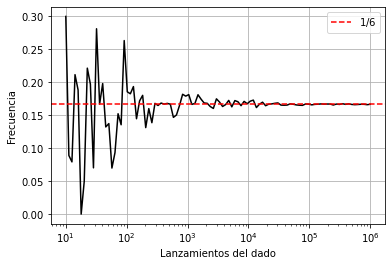

In [11]:
Evento = 3

def GetFrecuencias(N:int): # ¿Cuántas veces sucedió el evento de interés en N lanzamientos del dado?
    
    NTimes = 0 # Contador que incrementa cada vez que el lanzamiento es igual al evento de interés
    
    for i in range(int(N)):
        lanzamiento = np.random.randint(1,7) # Dado que la indexación de Python empieza en 0, hay que sumar +1 al límite
                                             # superior del rango.
        if lanzamiento == Evento:
            NTimes += 1
    
    return NTimes/N

n = np.logspace(1,6,100)
freqs = np.zeros(len(n))

for i in range(len(n)):
    freqs[i] = GetFrecuencias(n[i])
    
plt.plot(n,freqs,c='k')
plt.grid()
plt.xlabel('Lanzamientos del dado')
plt.ylabel('Frecuencia')
plt.axhline(y=1/6,color='r',ls='--',label = r'$1/6$')
plt.xscale('log')
plt.legend()

Durante todos los lanzamientos aleatorios del experimento la probabilidad del evento de interés se mantiene dentro del rango $[0,1]$, y conforme aumenta el número de lanzamientos, la probabilidad efectivamente se aproxima a $\frac{1}{6}$

# 06/27/2022

## Base de datos Covid-19

El archivo a continuación es un excelente ejemplo de situaciones que requieren análisis de grandes volúmenes de datos y la importancia de las herramientas estadísticas y computacionales para procesar estos datos con el fin de extraer conclusiones coherentes con la realidad que guíen la toma de decisiones.

In [12]:
path = r"C:\Users\lucas\Downloads\osb_enftransm_Covid19_27092021.csv"
# SaluData. Observatorio de Salud de Bogotá. (2020) Casos confirmados de COVID-19 en Bogotá D.C. (27 de septiembre 2021) 

CovidDf = pd.read_csv(path, sep = ';')
CovidDf

,CASO,FECHA_DE_INICIO_DE_SINTOMAS,FECHA_DIAGNOSTICO,CIUDAD,LOCALIDAD_ASIS,EDAD,UNI_MED,SEXO,FUENTE_O_TIPO_DE_CONTAGIO,UBICACION,ESTADO
0,1,2020-02-26,2020-03-06,Bogotá,Usaquén,19,1,F,Importado,Casa,Recuperado
1,2,2020-03-04,2020-03-10,Bogotá,Engativá,22,1,F,Importado,Casa,Recuperado
2,3,2020-03-07,2020-03-10,Bogotá,Engativá,28,1,F,Importado,Casa,Recuperado
3,4,2020-03-06,2020-03-12,Bogotá,Fontibón,36,1,F,Importado,Casa,Recuperado
4,5,2020-03-06,2020-03-12,Bogotá,Kennedy,42,1,F,Importado,Casa,Recuperado
...,...,...,...,...,...,...,...,...,...,...,...
1449284,1449285,NaN,2021-09-25,Sin dato,Sin dato,17,1,F,En estudio,Casa,Leve
1449285,1449286,NaN,2021-09-26,Sin dato,Sin dato,79,1,M,En estudio,Casa,Leve
1449286,1449287,NaN,2021-09-25,Sin dato,Sin dato,38,1,M,En estudio,Casa,Leve
1449287,1449288,2021-09-09,2021-09-24,Sin dato,Sin dato,21,1,F,En estudio,Casa,Recuperado


In [13]:
CovidDf.count()

CASO                           1449289
FECHA_DE_INICIO_DE_SINTOMAS     981982
FECHA_DIAGNOSTICO              1449289
CIUDAD                         1449289
LOCALIDAD_ASIS                 1449289
EDAD                           1449289
UNI_MED                        1449289
SEXO                           1449289
FUENTE_O_TIPO_DE_CONTAGIO      1449289
UBICACION                      1449289
ESTADO                         1449289
dtype: int64